In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## section 1

In [2]:
df = pd.read_csv("cars.csv")
df1 = df.copy()
df1["Mileage"] = df1["Mileage"].str.rstrip(" kmpl") 
df1["Mileage"] = df1["Mileage"].str.rstrip(" km/g") 
df1["Engine"] = df1["Engine"].str.rstrip(" CC") 
df1["Power"] = df1["Power"].str.rstrip(" bhp") 
df1["Power"]= df1["Power"].replace(regex="null", value = np.nan) 
df1["Fuel_Type"]=df1["Fuel_Type"].astype("category") 
df1["Transmission"]=df1["Transmission"].astype("category") 
df1["Owner_Type"]=df1["Owner_Type"].astype("category") 
df1["Mileage"]=df1["Mileage"].astype("float") 
df1["Power"]=df1["Power"].astype("float") 
df1["Engine"]=df1["Engine"].astype("float") 
df1["Company"]=df1["Name"].str.split(" ").str[0] 
df1["Model"]=df1["Name"].str.split(" ").str[1]+df1["Name"].str.split(" ").str[2] 

print(df1.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_Price  Price  Company      Model  
0        NaN   1.75   Maruti     WagonR  
1        NaN  12.50  Hyundai   C

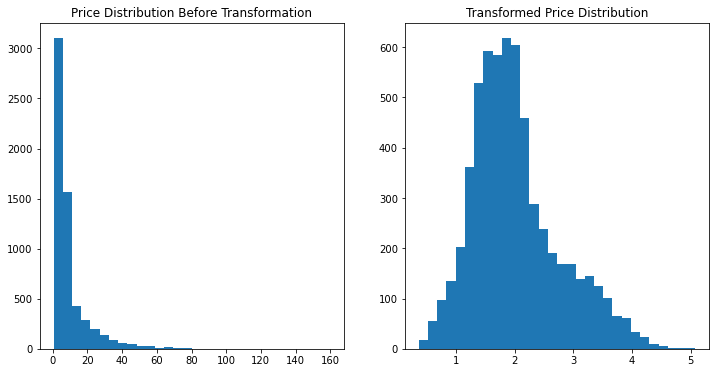

In [3]:
'''
1. Transform Price so that it looks more normal, produce histograms of the variable before and 
after transformation
'''
df1["Transformed_Price"] = np.log1p(df1["Price"])

# Plot histograms before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df1["Price"], bins=30)
plt.title("Price Distribution Before Transformation")
plt.subplot(1, 2, 2)
plt.hist(df1["Transformed_Price"], bins=30)
plt.title("Transformed Price Distribution")
plt.show()

In [12]:
'''
2. How many values are missing for Power and Engine?
'''
power_missing = df1["Power"].isnull().sum()
engine_missing = df1["Engine"].isnull().sum()

print("Missing values in Power:", power_missing)
print("Missing values in Engine:", engine_missing)

Missing values in Power: 143
Missing values in Engine: 36


In [5]:
'''
3. Which column has the most missing values and what should we do about it?
'''
column_with_most_missing = df1.isnull().sum().idxmax()
print("Column with most missing values:", column_with_most_missing)
print("Missing values:", df1[column_with_most_missing].isnull().sum())
# Decide the imputation strategy based on the column. If it's a categorical column, you might use mode, etc.

Column with most missing values: New_Price
Missing values: 5195


In [6]:
'''
4. Build a model of transformed price based on Power, Mileage, Kilometers Driven, and Year, how 
much variance is explained?
'''


# Features and target variable
features = ["Power", "Mileage", "Kilometers_Driven", "Year"]
target = "Transformed_Price"

# Drop rows with missing values in any of the selected columns
df_model = df1.dropna(subset=features + [target])

# Split data into train and test sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate variance explained
variance_explained = r2_score(y_test, y_pred)
print("Variance Explained by Initial Model:", variance_explained)
print("Number of rows used for training the initial model:", X_train.shape[0])


Variance Explained by Initial Model: 0.813154710970345
Number of rows used for training the initial model: 4699


In [7]:
'''
6. Fill the missing values in Power and Mileage with their respective means and rebuild the model. 
Now how much variance is explained? 
'''
# Fill missing values with mean
df2 = df1[features]
df2["Power"]= df1["Power"].fillna(df1["Power"].mean(), inplace=False)
df2["Mileage"] = df1["Mileage"].fillna(df1["Mileage"].mean(), inplace=False)

# Rebuild the model
X = df2[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

variance_explained_after_imputation = r2_score(y_test, y_pred)
print("Variance Explained after imputation:", variance_explained_after_imputation)
print("Number of rows used for training the model after imputation:", X_train.shape[0])


Variance Explained after imputation: 0.7966600187871471
Number of rows used for training the model after imputation: 4815


C:\Users\93505\AppData\Local\Temp\ipykernel_115920\3993698837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Power"]= df1["Power"].fillna(df1["Power"].mean(), inplace=False)
C:\Users\93505\AppData\Local\Temp\ipykernel_115920\3993698837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Mileage"] = df1["Mileage"].fillna(df1["Mileage"].mean(), inplace=False)


In [8]:
'''
8. Impute the missing data using MICE and rebuild the model 
MICE documentation: 
https://www.statsmodels.org/dev/generated/statsmodels.imputation.mice.MICE.html 
'''

imputer = IterativeImputer(random_state=100, max_iter=10)

df_train = df1.loc[:, ["Power", "Mileage", "Kilometers_Driven", "Year"]]
df_train.head()

# fit on the dataset
imputer.fit(df_train)

df_imputed = imputer.transform(df_train)
df_imputed[:10]

df3 = df1[features]
df3.loc[:, ["Power", "Mileage", "Kilometers_Driven", "Year"]] = df_imputed

# Rebuild the model after imputation
X = df3[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

variance_explained_after_mice = r2_score(y_test, y_pred)
print("Variance Explained after MICE imputation:", variance_explained_after_mice)
print("Number of rows used for training the model after MICE imputation:", X_train.shape[0])



C:\Users\93505\AppData\Local\Temp\ipykernel_115920\3159634818.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, ["Power", "Mileage", "Kilometers_Driven", "Year"]] = df_imputed


Variance Explained after MICE imputation: 0.7528162077236503
Number of rows used for training the model after MICE imputation: 4815


In [14]:
df3

,Power,Mileage,Kilometers_Driven,Year
0,58.16,26.60,72000.0,2010.0
1,126.20,19.67,41000.0,2015.0
2,88.70,18.20,46000.0,2011.0
3,88.76,20.77,87000.0,2012.0
4,140.80,15.20,40670.0,2013.0
...,...,...,...,...
6014,74.00,28.40,27365.0,2014.0
6015,71.00,24.40,100000.0,2015.0
6016,112.00,14.00,55000.0,2012.0
6017,67.10,18.90,46000.0,2013.0


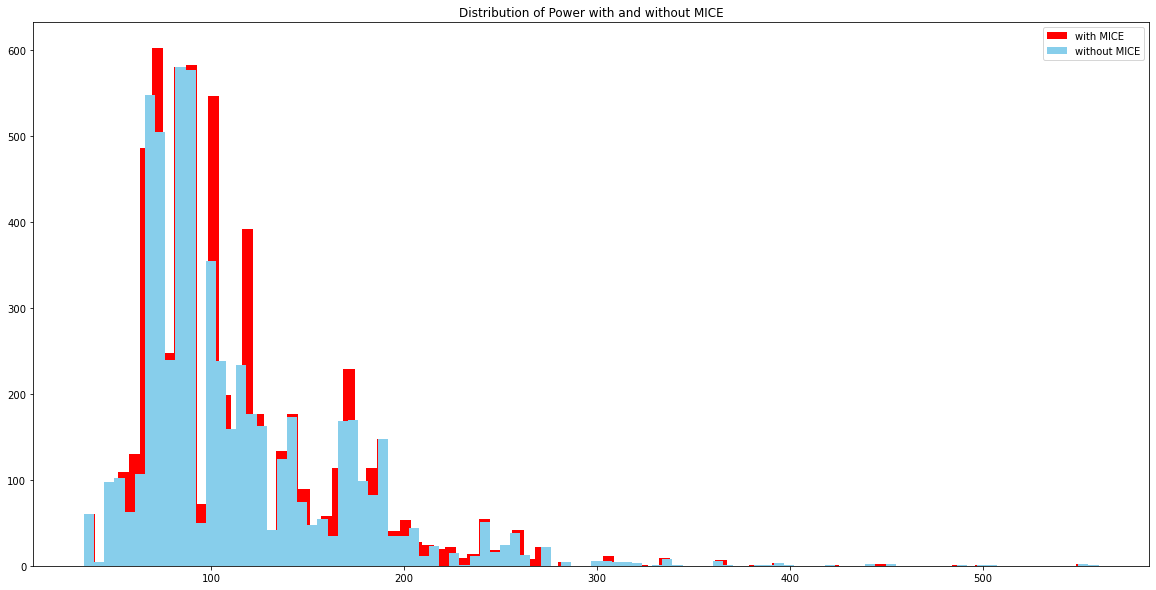

In [11]:
'''10. Plot the distribution of Power with and without MICE 
'''
plt.figure(figsize=(20,10))
plt.hist(df3['Power'],bins=90,label='with MICE',color="red")
plt.hist(df1['Power'],bins=100,label='without MICE',color="skyblue")
plt.legend(loc='upper right')
plt.title("Distribution of Power with and without MICE")
plt.show()

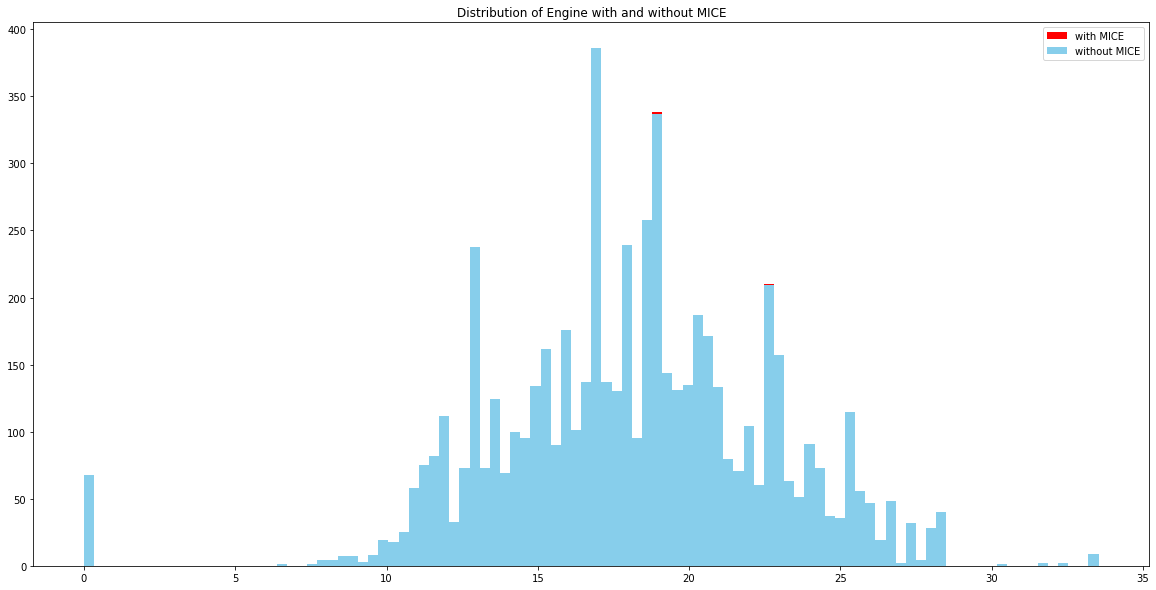

In [15]:
'''
11. Plot the distribution of Engine with and without MICE
'''
plt.figure(figsize=(20,10))
plt.hist(df3['Mileage'],bins=100,label='with MICE',color="red")
plt.hist(df1['Mileage'],bins=100,label='without MICE',color="skyblue")
plt.legend(loc='upper right')
plt.title("Distribution of Engine with and without MICE")
plt.show()

## Section 2

In [34]:
customerDf = pd.read_csv("lab06_customers.csv")
customerDf = pd.get_dummies(data=customerDf, columns=['sex', 'race'], prefix=['sex', 'race'])
customerDf["hispanic_male"] = np.multiply(customerDf["race_hispanic"], customerDf["sex_male"])
customerDf["hispanic_female"] = np.multiply(customerDf["race_hispanic"],customerDf["sex_female"])
customerDf["white_male"] = np.multiply(customerDf["race_white"],customerDf["sex_male"])
customerDf["white_female"] = np.multiply(customerDf["race_white"],customerDf["sex_female"])
customerDf["black_male"] = np.multiply(customerDf["race_black"],customerDf["sex_male"])
customerDf["black_female"] = np.multiply(customerDf["race_black"],customerDf["sex_female"])
customerDf["asian_male"] = np.multiply(customerDf["race_asian"],customerDf["sex_male"])
customerDf["asian_female"] = np.multiply(customerDf["race_asian"],customerDf["sex_female"])
# drop other category for race and sex
customerDf.drop(columns = ['sex_other', 'race_other'], inplace = True)
customerDf


,income,schoolYears,age,spend,sex_female,sex_male,race_asian,race_black,race_hispanic,race_white,hispanic_male,hispanic_female,white_male,white_female,black_male,black_female,asian_male,asian_female
0,157966.0,18.0,31.0,659.97,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,11134.0,14.0,50.0,719.69,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,555369.0,14.0,32.0,854.61,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,272387.0,18.0,52.0,855.20,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,105459.0,17.0,49.0,758.33,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17309.0,11.0,51.0,750.85,1,0,0,0,1,0,0,1,0,0,0,0,0,0
9996,63122.0,15.0,47.0,523.34,1,0,0,1,0,0,0,0,0,0,0,1,0,0
9997,27525.0,14.0,54.0,804.27,1,0,0,0,0,1,0,0,0,1,0,0,0,0
9998,111824.0,18.0,29.0,626.38,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [43]:
'''
1. Build a linear regression with all the dependent variables and two way interactions between sex 
and race, consider the other category for race and sex to be the reference category and treat it 
appropriately 
'''

# Build linear regression model
X = customerDf.drop(["spend"], axis=1)
y = customerDf["spend"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

variance_explained_after_mice = r2_score(y_test, y_pred)
print("Variance Explained after MICE imputation:", variance_explained_after_mice)
print("Number of rows used for training the model after MICE imputation:", X_train.shape[0])


Variance Explained after MICE imputation: 0.8642171770661521
Number of rows used for training the model after MICE imputation: 8000


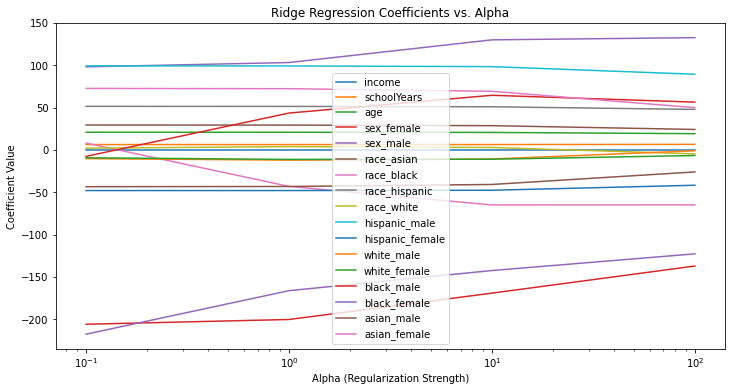

In [45]:
'''
2. Build ridge models with various values for alpha. Create a chart showing how the coefficients 
change with alpha values 
'''
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

alphas = [0.1, 1, 10, 100]
coefficients = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

# Plot the coefficients against alpha values
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):  
    plt.plot(alphas, [coef[i] for coef in coefficients], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs. Alpha')
plt.legend()
plt.show()


D:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.431e+06, tolerance: 1.077e+04
  model = cd_fast.enet_coordinate_descent(
D:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.162e+05, tolerance: 1.077e+04
  model = cd_fast.enet_coordinate_descent(


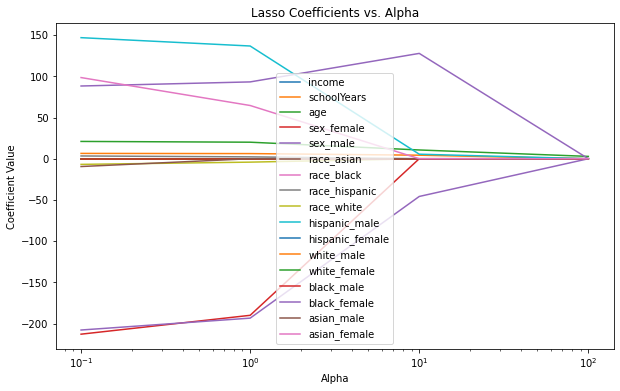

In [44]:
'''
3. Build lasso models with various values for alpha. Create a chart showing how the coefficients 
change with alpha values 
'''
from sklearn.linear_model import Lasso

coefficients = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefficients.append(lasso_model.coef_)

# Plotting coefficients for different alpha values
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(alphas, [coef[i] for coef in coefficients], label=X.columns[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('Lasso Coefficients vs. Alpha')
plt.xscale('log')
plt.show()


In [38]:
'''
4. Compare the coefficients from linear regression, ridge, and lasso (select an alpha value using 
your chart) 
'''
selected_alpha = 1  # Choose an alpha value based on the visualization

ridge_model = Ridge(alpha=selected_alpha)
ridge_model.fit(X, y)
lasso_model = Lasso(alpha=selected_alpha)
lasso_model.fit(X, y)

print("Linear Regression Coefficients:", lr_model.coef_)
print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)


Linear Regression Coefficients: [ 23295.29056126  -5998.30197265    290.44258034  48054.34497692
 -28016.0485592  -63703.90005866 -18547.14692217 -26411.33466573
 -42938.37641543 -20258.8943175   21505.15585978 -15289.06202884
 -10251.32166018  12855.54373544  78381.80895574 -13002.60243062
 -50701.29762804]
Ridge Coefficients: [ 5.56848774e-05  6.18532710e+00  2.09926175e+01 -1.96543952e+02
  1.04324657e+02  3.07297916e+01 -4.25597824e+01  4.79454097e+01
  6.07931480e+00  1.03236235e+02 -4.50242193e+01 -1.12965978e+01
 -1.28559969e+01  4.34794282e+01 -1.66259252e+02 -4.11180272e+01
  7.18478188e+01]
Lasso Coefficients: [ 5.82702627e-05  5.89083926e+00  1.99742573e+01 -1.92263767e+02
  9.03979523e+01  0.00000000e+00 -0.00000000e+00  2.55175495e+00
 -2.78191923e+00  1.36210392e+02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.92428460e+02 -0.00000000e+00
  6.57193207e+01]


D:\software\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.666e+05, tolerance: 1.345e+04
  model = cd_fast.enet_coordinate_descent(


In [47]:
'''
5. Compare the R2 from lr, ridge, and lasso 
'''
from sklearn.metrics import r2_score

# Predictions
lr_predictions = lr_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate R-squared values
lr_r2 = r2_score(y_test, lr_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("R-squared for Linear Regression:", lr_r2)
print("R-squared for Ridge Regression:", ridge_r2)
print("R-squared for Lasso Regression:", lasso_r2)


R-squared for Linear Regression: 0.8635651143304007
R-squared for Ridge Regression: 0.8567143020926792
R-squared for Lasso Regression: 0.09900663804979992


In [49]:
'''
7. Which variables are dropped from the chosen model that were not dropped in linear 
regression?
'''
coefficients_lr = lr_model.coef_
coefficients_ridge = ridge_model.coef_
coefficients_lasso = lasso_model.coef_

# Find the variables dropped by Ridge 
variables_dropped_by_ridge = [variable for variable, coef_lr, coef_ridge in zip(X.columns, coefficients_lr, coefficients_ridge) if abs(coef_ridge) < abs(coef_lr)]

# Find the variables dropped by Lasso 
variables_dropped_by_lasso = [variable for variable, coef_lasso in zip(X.columns, coefficients_lasso) if coef_lasso == 0]

# Print or examine the variables dropped by Ridge and Lasso
print("Variables dropped by Ridge:", variables_dropped_by_ridge)
print("Variables dropped by Lasso:", variables_dropped_by_lasso)


Variables dropped by Ridge: ['income', 'age', 'sex_female', 'race_asian', 'race_hispanic', 'race_white', 'hispanic_male', 'hispanic_female', 'white_male', 'white_female', 'black_female', 'asian_male', 'asian_female']
Variables dropped by Lasso: ['schoolYears', 'sex_female', 'sex_male', 'race_asian', 'race_black', 'race_hispanic', 'race_white', 'hispanic_male', 'hispanic_female', 'white_male', 'white_female', 'black_male', 'black_female', 'asian_male', 'asian_female']
